<a href="https://colab.research.google.com/github/Victorvv1/Curso-de-Analisis-de-Datos-/blob/main/Agregacion_y_Agrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agregación y Agrupación

In [ ]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Datos de planetas

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


La columna "method" contiene los diferentes métodos o técnicas utilizados para detectar exoplanetas. Estos métodos incluyen:

1. **Radial Velocity**: Detecta planetas midiendo pequeños cambios en la velocidad de la estrella causados por la atracción gravitacional del planeta. También conocido como efecto Doppler.

2. **Transit**: Detecta planetas observando la pequeña disminución en el brillo de una estrella cuando un planeta pasa frente a ella desde nuestra perspectiva.

3. **Imaging**: Detección directa del planeta mediante imágenes, generalmente en el infrarrojo.

4. **Microlensing**: Utiliza el efecto de lente gravitacional de una estrella que amplifica temporalmente la luz de una estrella de fondo, revelando planetas alrededor de la estrella lente.

5. **Timing**: Detecta planetas observando variaciones periódicas en fenómenos regulares, como los tiempos de pulsación de una estrella púlsar.

6. **Astrometry**: Mide cambios muy pequeños en la posición de una estrella causados por planetas que orbitan alrededor de ella.

7. **Transit Timing Variations (TTV)**: Detecta planetas adicionales midiendo variaciones en los tiempos de tránsito de planetas ya conocidos.

Cada uno de estos métodos tiene sus propias ventajas y limitaciones en términos de qué tipos de planetas pueden detectar (por tamaño, distancia orbital, etc.). Los métodos más prolíficos históricamente han sido la velocidad radial y el tránsito.

## Agregaciones simples en Pandas

In [ ]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.random(5))
ser

,0
0,0.773956
1,0.438878
2,0.858598
3,0.697368
4,0.094177


In [ ]:
ser.sum()

np.float64(2.8629777851664118)

In [ ]:
ser.mean()

np.float64(0.5725955570332824)

In [ ]:
df = pd.DataFrame({'A': rng.random(5),
                   'B': rng.random(5)})
df

,A,B
0,0.975622,0.370798
1,0.761140,0.926765
2,0.786064,0.643865
3,0.128114,0.822762
4,0.450386,0.443414


In [ ]:
df.mean()

,0
A,0.620265
B,0.641521


In [ ]:
df.mean(axis='columns')

,0
0,0.673210
1,0.843952
2,0.714965
3,0.475438
4,0.446900


In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## groupby: Split, Apply, Combine

Las agregaciones simples pueden dar una idea general del conjunto de datos, pero a menudo preferimos agregar condicionalmente según alguna etiqueta o índice: esto se implementa mediante la operación "groupby".
El nombre "group by" proviene de un comando del lenguaje de bases de datos SQL, pero quizás sea más ilustrativo pensar en él en los términos acuñados inicialmente por Hadley Wickham, conocido por Rstats: *dividir, aplicar, combinar*.

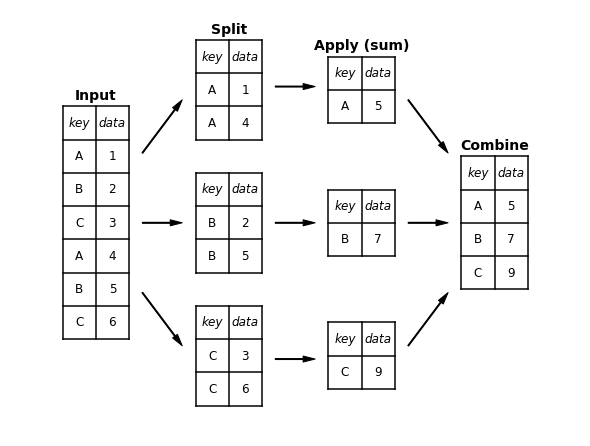

Esto ilustra lo que la operación `groupby` logra:

- El paso de *división* (split) implica segmentar y agrupar un `DataFrame` según el valor de la clave especificada.
- El paso de *aplicación* (apply) implica calcular alguna función, generalmente una agregación, transformación o filtrado, dentro de los grupos individuales.
- El paso de *combinación* (combine) fusiona los resultados de estas operaciones en un array de salida.

Si bien esto ciertamente podría hacerse manualmente usando alguna combinación de comandos de enmascaramiento, agregación y fusión cubiertos anteriormente, una realización importante es que *las divisiones intermedias no necesitan ser instanciadas explícitamente*. En cambio, el `groupby` puede (a menudo) hacer esto en una sola pasada por los datos, actualizando la suma, media, recuento, mínimo u otro agregado para cada grupo a lo largo del camino.

El poder del `groupby` es que abstrae estos pasos: el usuario no necesita pensar en *cómo* se realiza el cálculo bajo el capó, sino que puede pensar en la *operación como un todo*.

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
df.groupby('key')

Tenga en cuenta que lo que se devuelve es un objeto DataFrameGroupBy, no un conjunto de objetos DataFrame. Este objeto es donde reside la clave: puede considérelo como una vista especial del DataFrame, que está lista para analizar los grupos, pero no realiza ningún cálculo real hasta que se aplica la agregación. Este enfoque de "evaluación diferida" permite implementar agregados comunes de forma eficiente y prácticamente transparente para el usuario.

Para obtener un resultado, podemos aplicar un agregado a este objeto DataFrameGroupBy

In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [ ]:
planets.groupby('method')['orbital_period'].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [ ]:
for (method, group) in planets.groupby('method'):
  print(f"{method:30s} shape={group.shape}")

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
planets.groupby('method')['year'].describe().unstack()

method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
from IPython.display import HTML
HTML(planets.groupby('method')['year'].describe().unstack().to_frame().to_html())

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


## Aggregate

In [ ]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


## Filter

In [ ]:
def filter_func(x):
  return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

## Transformation

In [ ]:
def center(x):
  return x - x.mean()

df.groupby('key').transform(center)

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


## Apply

In [ ]:
def norm_by_data2(x):
  x['data1'] /= x['data2'].sum()
  return x
df.groupby('key').apply(norm_by_data2)

<ipython-input-31-6483aeab3dc1>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('key').apply(norm_by_data2)


key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

## Especificado Split Key

In [ ]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
L = [0, 1, 0, 1, 2, 0]

In [ ]:
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


1. La lista `L = [0, 1, 0, 1, 2, 0]` tiene 6 elementos, lo que indica que el DataFrame `df` debe tener exactamente 6 filas (para que la agrupación funcione correctamente).

2. El método `groupby(L)` agrupa las filas del DataFrame según los valores en la lista `L`:
   - Las filas 0, 2, y 5 (donde el valor en `L` es 0) se agrupan juntas
   - Las filas 1 y 3 (donde el valor en `L` es 1) se agrupan juntas
   - La fila 4 (donde el valor en `L` es 2) queda en su propio grupo

3. El método `.sum()` luego calcula la suma de todas las columnas numéricas dentro de cada grupo.

El resultado será un nuevo DataFrame con:
- 3 filas (una para cada valor único en `L`: 0, 1, y 2)
- El mismo número de columnas numéricas que tenía el DataFrame original
- Valores que representan la suma de los valores en cada grupo

Este tipo de agrupación es útil cuando tienes una forma de agrupar filas de un DataFrame que no está basada en los valores de una columna, sino en una lista externa que define la pertenencia a grupos.

In [ ]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [ ]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [ ]:
mapping = {'A': 'vowels', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()


,data1,data2
key,,
consonant,12,19
vowels,3,8


In [ ]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [ ]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowels,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [ ]:
# Ejemplo con planets
decade = 10 * (planets['year'] // 10)

In [ ]:
decade = decade.astype(str) + 's'
decade

,year
0,2000s
1,2000s
2,2010s
3,2000s
4,2000s
...,...
1030,2000s
1031,2000s
1032,2000s
1033,2000s


In [ ]:
decade.name = 'decade'

In [ ]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
